In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats1 = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs1 = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats1, lngs1)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

746

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a247e26b2e85cc04366e12a9be7cad7


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_description = city_weather["weather"][0]["description"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Description": city_description,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 15 | bengkulu
Processing Record 2 of Set 15 | ribeira grande
Processing Record 3 of Set 15 | touros
Processing Record 4 of Set 15 | ambovombe
Processing Record 5 of Set 15 | cape town
Processing Record 6 of Set 15 | butaritari
Processing Record 7 of Set 15 | tibu
Processing Record 8 of Set 15 | saint-philippe
Processing Record 9 of Set 15 | hofn
Processing Record 10 of Set 15 | busselton
Processing Record 11 of Set 15 | saint george
Processing Record 12 of Set 15 | rikitea
Processing Record 13 of Set 15 | buraydah
Processing Record 14 of Set 15 | codrington
Processing Record 15 of Set 15 | punta arenas
Processing Record 16 of Set 15 | hithadhoo
Processing Record 17 of Set 15 | bredasdorp
Processing Record 18 of Set 15 | carnarvon
Processing Record 19 of Set 15 | castro
Processing Record 20 of Set 15 | hounde
Processing Record 21 of Set 15 | atuona
Processing Record 22 of Set 15 | biak
Processing Reco

Processing Record 40 of Set 18 | mareeba
Processing Record 41 of Set 18 | provideniya
Processing Record 42 of Set 18 | stykkisholmur
Processing Record 43 of Set 18 | port elizabeth
Processing Record 44 of Set 18 | dwarka
Processing Record 45 of Set 18 | talnakh
Processing Record 46 of Set 18 | ouro preto do oeste
Processing Record 47 of Set 18 | siocon
Processing Record 48 of Set 18 | iroquois falls
Processing Record 49 of Set 18 | pec
Processing Record 50 of Set 18 | bridlington
Processing Record 1 of Set 19 | westport
Processing Record 2 of Set 19 | meadow lake
Processing Record 3 of Set 19 | bathsheba
Processing Record 4 of Set 19 | chuy
Processing Record 5 of Set 19 | pangody
Processing Record 6 of Set 19 | khalkhal
Processing Record 7 of Set 19 | ganzhou
Processing Record 8 of Set 19 | mount gambier
Processing Record 9 of Set 19 | camacha
Processing Record 10 of Set 19 | pinheiro machado
Processing Record 11 of Set 19 | lake havasu city
Processing Record 12 of Set 19 | kholtoson
P

Processing Record 24 of Set 22 | half moon bay
Processing Record 25 of Set 22 | soligalich
Processing Record 26 of Set 22 | belaya gora
Processing Record 27 of Set 22 | yining
Processing Record 28 of Set 22 | hong gai
Processing Record 29 of Set 22 | rampura
Processing Record 30 of Set 22 | grand river south east
City not found. Skipping...
Processing Record 31 of Set 22 | orneta
Processing Record 32 of Set 22 | porto novo
Processing Record 33 of Set 22 | kempele
Processing Record 34 of Set 22 | chilca
Processing Record 35 of Set 22 | lavrentiya
Processing Record 36 of Set 22 | high level
Processing Record 37 of Set 22 | port keats
Processing Record 38 of Set 22 | talaya
Processing Record 39 of Set 22 | shellbrook
Processing Record 40 of Set 22 | arraial do cabo
Processing Record 41 of Set 22 | mys shmidta
City not found. Skipping...
Processing Record 42 of Set 22 | sasmuan
Processing Record 43 of Set 22 | caravelas
Processing Record 44 of Set 22 | raga
Processing Record 45 of Set 22 |

Processing Record 10 of Set 26 | morros
Processing Record 11 of Set 26 | henties bay
Processing Record 12 of Set 26 | witu
Processing Record 13 of Set 26 | hami
Processing Record 14 of Set 26 | hihya
Processing Record 15 of Set 26 | vysokogornyy
Processing Record 16 of Set 26 | boa vista
Processing Record 17 of Set 26 | manali
Processing Record 18 of Set 26 | phalombe
Processing Record 19 of Set 26 | olavarria
Processing Record 20 of Set 26 | shimoda
Processing Record 21 of Set 26 | alice springs
Processing Record 22 of Set 26 | venice
Processing Record 23 of Set 26 | san vicente
Processing Record 24 of Set 26 | port harcourt
Processing Record 25 of Set 26 | baturite
Processing Record 26 of Set 26 | kuzovatovo
Processing Record 27 of Set 26 | samarai
Processing Record 28 of Set 26 | naron
Processing Record 29 of Set 26 | sistranda
Processing Record 30 of Set 26 | salas
Processing Record 31 of Set 26 | panguna
Processing Record 32 of Set 26 | bangkal
Processing Record 33 of Set 26 | okh

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0        Bengkulu  -3.8004  102.2655     76.19        90          28   
1  Ribeira Grande  38.5167  -28.7000     64.80       100          75   
2          Touros  -5.1989  -35.4608     79.30        85          24   
3       Ambovombe -25.1667   46.0833     68.07        77          15   
4       Cape Town -33.9258   18.4232     60.12        83           0   
5      Butaritari   3.0707  172.7902     81.34        79          59   
6            Tibu   8.6390  -72.7358     95.09        39           0   
7  Saint-Philippe -21.3585   55.7679     71.19        76          38   
8            Hofn  64.2539  -15.2082     53.62        54          75   
9       Busselton -33.6500  115.3333     61.27        67          65   

   Wind Speed Country              Description                 Date  
0        3.78      ID            moderate rain  2022-05-22 18:30:35  
1        2.30      PT  light intensity drizzle  2022-05-22 18:30:36  
2       13.62      BR               few clouds  2022-05-22 18:30:36  
3        6.69      MG               few clouds  2022-05-22 18:30:36  
4        5.75      ZA                clear sky  2022-05-22 18:28:48  
5       10.80      KI               light rain  2022-05-22 18:30:37  
6        4.65      CO                clear sky  2022-05-22 18:30:38  
7       11.23      RE         scattered clouds  2022-05-22 18:30:38  
8       20.71      IS            broken clouds  2022-05-22 18:30:39  
9       23.49      AU            broken clouds  2022-05-22 18:30:39

In [12]:
new_column_order= ["City","Country","Date","Lat","Lng","Max Temp","Humidity", "Cloudiness","Wind Speed","Description"
            ]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

City Country                 Date      Lat       Lng  Max Temp  \
0        Bengkulu      ID  2022-05-22 18:30:35  -3.8004  102.2655     76.19   
1  Ribeira Grande      PT  2022-05-22 18:30:36  38.5167  -28.7000     64.80   
2          Touros      BR  2022-05-22 18:30:36  -5.1989  -35.4608     79.30   
3       Ambovombe      MG  2022-05-22 18:30:36 -25.1667   46.0833     68.07   
4       Cape Town      ZA  2022-05-22 18:28:48 -33.9258   18.4232     60.12   
5      Butaritari      KI  2022-05-22 18:30:37   3.0707  172.7902     81.34   
6            Tibu      CO  2022-05-22 18:30:38   8.6390  -72.7358     95.09   
7  Saint-Philippe      RE  2022-05-22 18:30:38 -21.3585   55.7679     71.19   
8            Hofn      IS  2022-05-22 18:30:39  64.2539  -15.2082     53.62   
9       Busselton      AU  2022-05-22 18:30:39 -33.6500  115.3333     61.27   

   Humidity  Cloudiness  Wind Speed              Description  
0        90          28        3.78            moderate rain  
1       100          75        2.30  light intensity drizzle  
2        85          24       13.62               few clouds  
3        77          15        6.69               few clouds  
4        83           0        5.75                clear sky  
5        79          59       10.80               light rain  
6        39           0        4.65                clear sky  
7        76          38       11.23         scattered clouds  
8        54          75       20.71            broken clouds  
9        67          65       23.49            broken clouds

In [13]:
# Create the output file (CSV).
output_data_file = 'WeatherPy_Database.csv'
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/21/22'

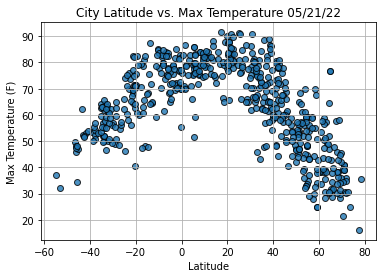

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

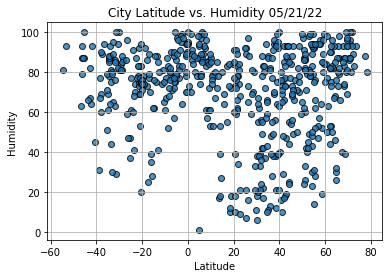

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

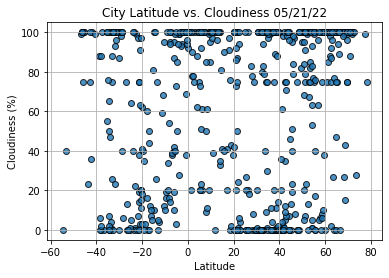

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

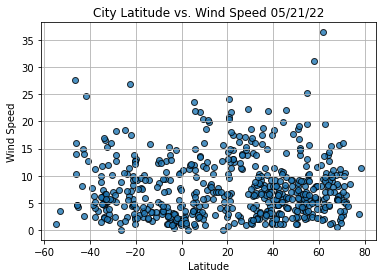

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

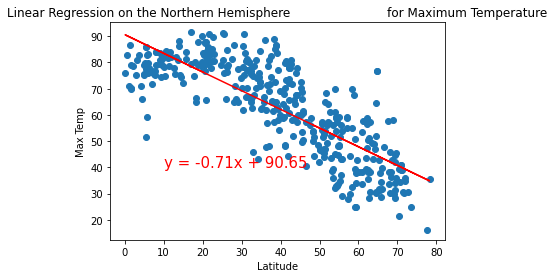

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

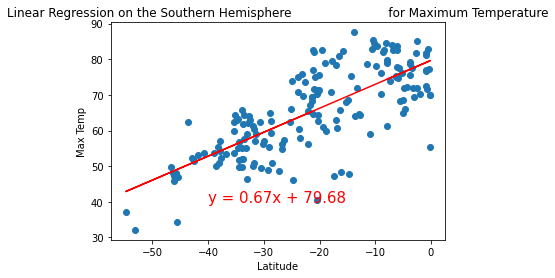

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-40,40))

The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

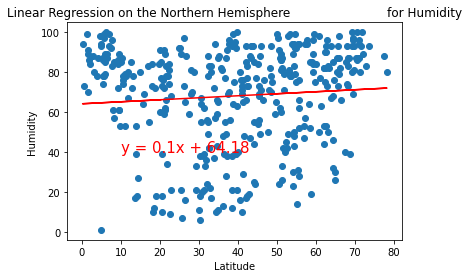

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Humidity', 'Humidity',(10,40))

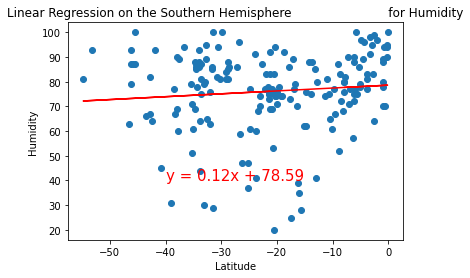

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Humidity', 'Humidity',(-40,40))

The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

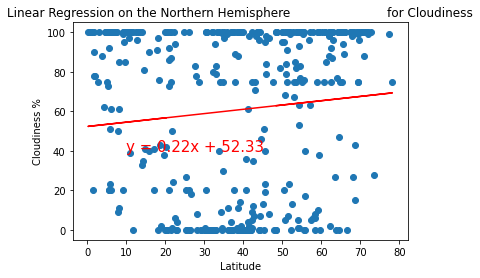

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness %',(10,40))

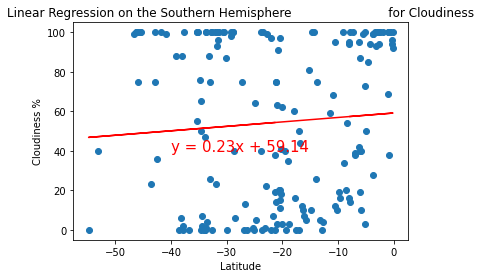

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness %',(-40,40))

The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

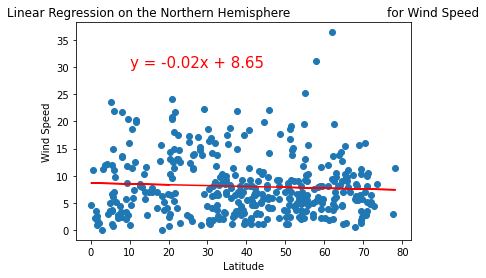

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,30))

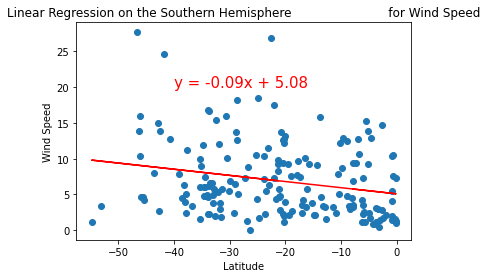

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-40,20))

The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 